## Starting to make a more generic G-Code library for 2429 tools 2022 2010 CJH
* made a library called simplegcode
* has functions 
  * generate_gcode() to get the gcode and
  * plot_points() to get a plot of the points
* user just generates the points and tells the code which machine they want

In [283]:
import simplegcode as sg
from importlib import reload

In [296]:
# simple way to generate a grid
x_start, x_spacing = 0.5, 0.5
y_start, y_spacing = -0.5, -0.5
x_repeats = 2  # minimum 1
y_repeats = 3  # minimum 1

x = [x_start + x_spacing * _ for _ in range(x_repeats)]
y = [y_start + y_spacing * _ for _ in range(y_repeats)]
point_list = [(x_, y_) for x_ in x for y_ in y]
print(f'x range: ({min(x)},{max(x)})  y range: ({min(y)},{max(y)})\npointlist: {point_list}')

x range: (0.5,1.0)  y range: (-1.5,-0.5)
pointlist: [(0.5, -0.5), (0.5, -1.0), (0.5, -1.5), (1.0, -0.5), (1.0, -1.0), (1.0, -1.5)]


In [309]:
machine = 'bench'  # shapeoko or benchmill
overrides = {'DRILL_DEPTH':-0.267} # dictionary of what to change from default
reload(sg)
code = sg.generate_gcode(point_list, machine=machine, peck=False, overrides=overrides, save_file=False)
print(code)

Using the following settings: {'DRILL_DEPTH': -0.267, 'RETRACT_HEIGHT': 0.5, 'ENGAGE_HEIGHT': 0.1, 'LINEAR_FEED': 100, 'DRILL_FEED': 5, 'RETRACT_FEED': 30}

; ## CENTER DRILL CODE AUTOGENERATED FROM POINT LIST FOR SHAPEOKO- CJH 2022 0210 22:02:30
N1 G90 G20 G00 Z1. M00
; N2 (1/8 EM CRB 2FL 1/2 LOC)
N3 S12000 M03
G01 Z0.5 F30
; ##POINT #0:
G00 X0.5 Y-0.5 F100
G01 Z0.1 F30
Z-0.267 F5
Z0.5 F30
; ##POINT #1:
G00 X0.5 Y-1.0 F100
G01 Z0.1 F30
Z-0.267 F5
Z0.5 F30
; ##POINT #2:
G00 X0.5 Y-1.5 F100
G01 Z0.1 F30
Z-0.267 F5
Z0.5 F30
; ##POINT #3:
G00 X1.0 Y-1.5 F100
G01 Z0.1 F30
Z-0.267 F5
Z0.5 F30
; ##POINT #4:
G00 X1.0 Y-1.0 F100
G01 Z0.1 F30
Z-0.267 F5
Z0.5 F30
; ##POINT #5:
G00 X1.0 Y-0.5 F100
G01 Z0.1 F30
Z-0.267 F5
Z0.5 F30
; ## END OF POINTS
N1520 G91 G28 Z0
N1521 G28 X0 Y0
; ## END OF AUTOGENERATED PROGRAM


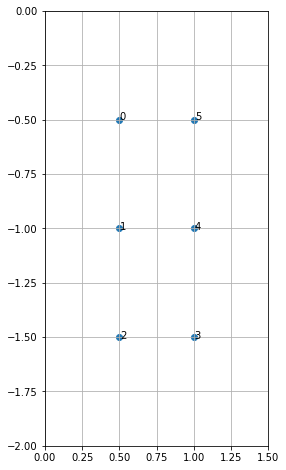

In [305]:
sg.plot_points(point_list, annotate=False, show_order=True)